# Data Cube

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : January 7th 2027  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sys
sys.path.append('../')

In [2]:
import os

In [3]:
print(sys.executable)
print(sys.version)
#print(sys.version_info)

/Users/dagoret/anaconda3/bin/python
3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]


In [4]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
!ls data

20200211-holo-4-003-uniformity-datacube.npy
holo-scan-auxtel.pickle


# Utility Functions

In [6]:
def get_list_of_position(arr):
    """
    Return the list of positions
    """
    
    
    ListOfPositions = [] 
    arrsize=len(arr)
    Npos=0
    
    for idx in np.arange(arrsize):
    
        currentposition = (arr[idx][1], arr[idx][2] )
    
        if currentposition not in ListOfPositions:
            ListOfPositions.append(currentposition)
            Npos+=1
            
            
    return Npos, ListOfPositions
    

In [7]:
def get_list_of_transmissions(arr):
    """
    
    """
    
    Narr=len(arr)
    Npos,list_of_position = get_list_of_position(arr)
    
    collectedtransmissions = np.empty(Npos, dtype=np.object)
    
    for idx in np.arange(Narr):   
        currentposition = (arr[idx][1], arr[idx][2])
        currentvalues = (arr[idx][3],arr[idx][4], arr[idx][5] )
  
    
        idx2=-1
        for position in list_of_position:
            idx2+=1
            
            if position == currentposition:
            
                if collectedtransmissions[idx2] == None:
                    collectedtransmissions[idx2] = []
                    collectedtransmissions[idx2].append(currentvalues)
                else:
                    collectedtransmissions[idx2].append(currentvalues)
                       
    
    return collectedtransmissions    
       

# Read Input file

In [8]:
datadir="data"
files_list= os.listdir(datadir)
print(files_list)
filename=files_list[1]
fullfilename=os.path.join(datadir,filename)
print(fullfilename)

['holo-scan-auxtel.pickle', '20200211-holo-4-003-uniformity-datacube.npy']
data/20200211-holo-4-003-uniformity-datacube.npy


In [9]:
arr=np.load(fullfilename)

In [10]:
arr.shape

(3443,)

In [11]:
NARR=arr.shape[0]

In [12]:
arr

array([(0,  0.,  0., 400.014, 0.28404813, 7.02226350e-04),
       (0,  0.,  0., 419.989, 0.09057611, 2.22853061e-04),
       (0,  0.,  0., 440.023, 0.02899506, 5.77351450e-05), ...,
       (2, -4., -4., 519.984, 0.06957727, 9.21319092e-05),
       (2, -4., -4., 540.001, 0.05970568, 7.87463120e-05),
       (2, -4., -4., 559.997, 0.03172864, 4.54447038e-05)],
      dtype=[('order', '<i8'), ('dx', '<f8'), ('dy', '<f8'), ('wl', '<f8'), ('DE', '<f8'), ('DE_std', '<f8')])

In [13]:
order0 = arr["order"]== 0
order1 = arr["order"]== 1
order2 = arr["order"]== 2

In [14]:
arr_0 = arr[order0]
arr_1 = arr[order1]
arr_2 = arr[order2]

# Order 1

## List of positions

In [15]:
Npos1,list_of_position_1 = get_list_of_position(arr_1)

In [16]:
Npos1

48

In [17]:
print(list_of_position_1)

[(0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (0.0, 4.0), (0.0, -1.0), (0.0, -2.0), (0.0, -4.0), (1.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 4.0), (1.0, -1.0), (1.0, -2.0), (1.0, -4.0), (2.0, 0.0), (2.0, 1.0), (2.0, 2.0), (2.0, 4.0), (2.0, -1.0), (2.0, -2.0), (2.0, -4.0), (4.0, 0.0), (4.0, 1.0), (4.0, 2.0), (4.0, 4.0), (4.0, -1.0), (4.0, -2.0), (-1.0, 0.0), (-1.0, 1.0), (-1.0, 2.0), (-1.0, 4.0), (-1.0, -1.0), (-1.0, -2.0), (-1.0, -4.0), (-2.0, 0.0), (-2.0, 1.0), (-2.0, 2.0), (-2.0, 4.0), (-2.0, -1.0), (-2.0, -2.0), (-2.0, -4.0), (-4.0, 0.0), (-4.0, 1.0), (-4.0, 2.0), (-4.0, 4.0), (-4.0, -1.0), (-4.0, -2.0), (-4.0, -4.0)]


In [18]:
len(list_of_position_1)

48

## Find the list of different positions

In [19]:
arr_1_ext = get_list_of_transmissions(arr_1)

<ipython-input-7-466b74409715>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


In [20]:
arr_1_ext

array([list([(400.014, 0.08113432020751664, 0.0004253119019335874), (419.989, 0.12204722120477443, 0.0005528540103098845), (440.023, 0.284278472426844, 0.000354299224153873), (459.966, 0.3078574663424993, 0.0003821479165009617), (479.965, 0.3094892134644252, 0.00038400269967797364), (500.021, 0.3117510441015642, 0.0003865603902908834), (519.984, 0.3137440396451491, 0.00038814322283485113), (540.001, 0.3057432204005373, 0.00037755880062014685), (559.997, 0.29572932835378696, 0.00036510376422183976), (579.972, 0.2789954155867061, 0.00034365951476988276), (599.999, 0.27221034565444824, 0.0003353242661302174), (620.003, 0.262478417420918, 0.0003231063036629244), (639.983, 0.25570255947710163, 0.0003143828759407265), (660.012, 0.24401572380960385, 0.0002998520486344919), (680.015, 0.2348525377870017, 0.0002884634375238189), (699.992, 0.22549142907719738, 0.0002765974929935576), (720.015, 0.21550731896352512, 0.0002645092387758762), (740.01, 0.20878474453391851, 0.000255805651175084), (759.9

## Plot transmissions

In [21]:
from matplotlib import cm, colors
values = np.linspace(-4.0, 4.0, 10)
norm = colors.Normalize(vmin=-4.0, vmax=4.0, clip=False)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.bwr)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.jet)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.seismic)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.hsv)
for value in values:
   print("%.2f" % value, "=",
      "red:%.2f" % mapper.to_rgba(value)[0],
      "green:%.2f" % mapper.to_rgba(value)[1],
      "blue:%.2f" % mapper.to_rgba(value)[2])

-4.00 = red:0.00 green:0.00 blue:1.00
-3.11 = red:0.22 green:0.22 blue:1.00
-2.22 = red:0.44 green:0.44 blue:1.00
-1.33 = red:0.67 green:0.67 blue:1.00
-0.44 = red:0.89 green:0.89 blue:1.00
0.44 = red:1.00 green:0.89 blue:0.89
1.33 = red:1.00 green:0.67 blue:0.67
2.22 = red:1.00 green:0.44 blue:0.44
3.11 = red:1.00 green:0.22 blue:0.22
4.00 = red:1.00 green:0.00 blue:0.00


Text(0.5, 0.98, 'Transmission for Order 1')

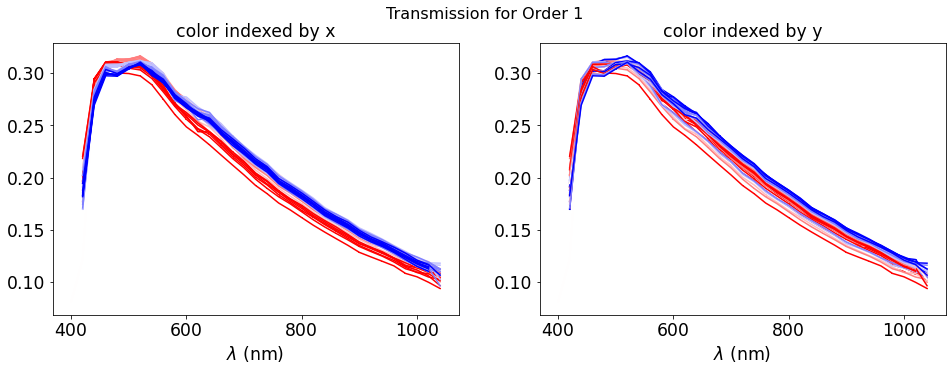

In [22]:
fig=plt.figure(figsize=(16,5))

fig.add_subplot(1,2,1)

for idx in np.arange(Npos1):    
    list_of_datapoints = arr_1_ext[idx]
    x,y = list_of_position_1[idx]
    c = mapper.to_rgba(x)
    wl,eff,eeff = zip(*list_of_datapoints)    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)
    plt.errorbar(wl,eff,yerr=eeff,color=c)  
    plt.title("color indexed by x")
    plt.xlabel("$\lambda$ (nm)")
 
fig.add_subplot(1,2,2)

for idx in np.arange(Npos1):    
    list_of_datapoints = arr_1_ext[idx]
    x,y = list_of_position_1[idx]
    c = mapper.to_rgba(y)
    wl,eff,eeff = zip(*list_of_datapoints)    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)  
    plt.errorbar(wl,eff,yerr=eeff,color=c)  
    plt.title("color indexed by y")
    plt.xlabel("$\lambda$ (nm)")
    
plt.suptitle("Transmission for Order 1",fontsize=16)  

## Order 2

In [23]:
Npos2,list_of_position_2 = get_list_of_position(arr_2)

In [24]:
arr_2_ext = get_list_of_transmissions(arr_2)

<ipython-input-7-466b74409715>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


Text(0.5, 0.98, 'Transmission for Order 2')

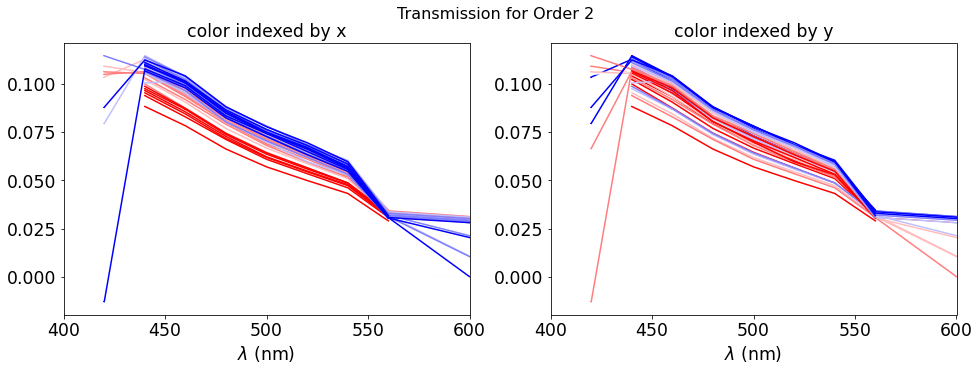

In [25]:
fig=plt.figure(figsize=(16,5))

fig.add_subplot(1,2,1)

for idx in np.arange(Npos2):    
    list_of_datapoints = arr_2_ext[idx]
    x,y = list_of_position_2[idx]
    c = mapper.to_rgba(x)
    wl,eff,eeff = zip(*list_of_datapoints)    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)
    plt.errorbar(wl,eff,yerr=eeff,color=c)  
    plt.title("color indexed by x")
    plt.xlim(400,600)
    plt.xlabel("$\lambda$ (nm)")
 
fig.add_subplot(1,2,2)

for idx in np.arange(Npos2):    
    list_of_datapoints = arr_2_ext[idx]
    x,y = list_of_position_2[idx]
    c = mapper.to_rgba(y)
    wl,eff,eeff = zip(*list_of_datapoints)    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)  
    plt.errorbar(wl,eff,yerr=eeff,color=c)  
    plt.title("color indexed by y")
    plt.xlim(400,600)
    plt.xlabel("$\lambda$ (nm)")
    
plt.suptitle("Transmission for Order 2",fontsize=16)  

# Order 0

In [26]:
Npos0,list_of_position_0 = get_list_of_position(arr_0)
arr_0_ext = get_list_of_transmissions(arr_0)

<ipython-input-7-466b74409715>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


Text(0.5, 0.98, 'Transmission for Order 0')

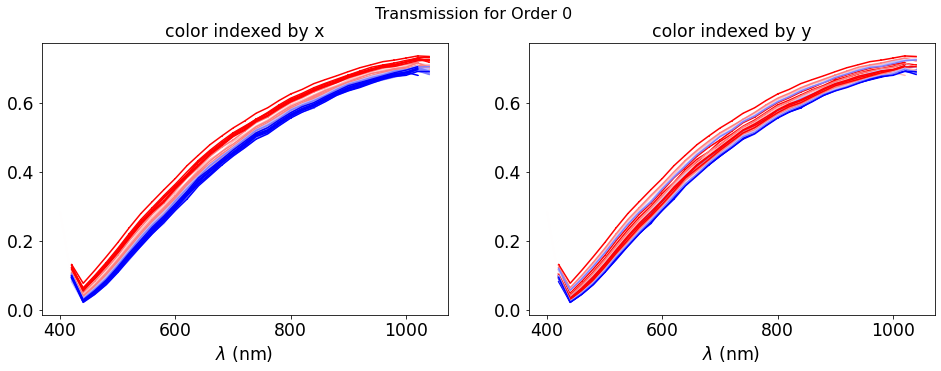

In [27]:
fig=plt.figure(figsize=(16,5))

fig.add_subplot(1,2,1)

for idx in np.arange(Npos0):    
    list_of_datapoints = arr_0_ext[idx]
    x,y = list_of_position_0[idx]
    c = mapper.to_rgba(x)
    wl,eff,eeff = zip(*list_of_datapoints)    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)
    plt.errorbar(wl,eff,yerr=eeff,color=c)  
    plt.title("color indexed by x")
    plt.xlabel("$\lambda$ (nm)")
 
fig.add_subplot(1,2,2)

for idx in np.arange(Npos0):    
    list_of_datapoints = arr_0_ext[idx]
    x,y = list_of_position_0[idx]
    c = mapper.to_rgba(y)
    wl,eff,eeff = zip(*list_of_datapoints)    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)  
    plt.errorbar(wl,eff,yerr=eeff,color=c)  
    plt.title("color indexed by y")
    plt.xlabel("$\lambda$ (nm)")
    
plt.suptitle("Transmission for Order 0",fontsize=16)  

## plot three efficiency

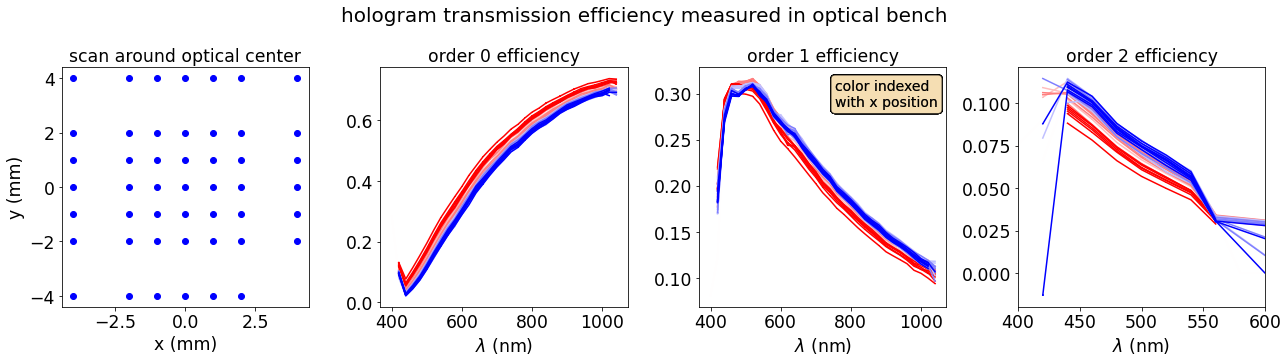

In [69]:
#textstr = '\n'.join((
#    r'$\mu=%.2f$' % (mu, ),
#    r'$\mathrm{median}=%.2f$' % (median, ),
#    r'$\sigma=%.2f$' % (sigma, )))

textstr = '\n'.join(("color indexed","with x position"))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig=plt.figure(figsize=(18,5))

fig.add_subplot(1,4,1)


X0,Y0 = list(zip(*list_of_position_0))
X1,Y1 = list(zip(*list_of_position_1))
X2,Y2 = list(zip(*list_of_position_2))


plt.scatter(X0,Y0,facecolor="b")
#plt.scatter(X1,Y1,facecolor="r")
#plt.scatter(X2,Y2,facecolor="g")
#plt.axes().set_aspect('equal')
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.title("scan around optical center")


fig.add_subplot(1,4,2)

for idx in np.arange(Npos0):    
    list_of_datapoints = arr_0_ext[idx]
    x,y = list_of_position_0[idx]
    c = mapper.to_rgba(x)
    wl,eff,eeff = zip(*list_of_datapoints)    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)
    plt.errorbar(wl,eff,yerr=eeff,color=c)  
    plt.title("order 0 efficiency")
    plt.xlabel("$\lambda$ (nm)")
    
ax = fig.add_subplot(1,4,3)    
for idx in np.arange(Npos1):    
    list_of_datapoints = arr_1_ext[idx]
    x,y = list_of_position_1[idx]
    c = mapper.to_rgba(x)
    wl,eff,eeff = zip(*list_of_datapoints)    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)
    plt.errorbar(wl,eff,yerr=eeff,color=c)  
    plt.title("order 1 efficiency")
    plt.xlabel("$\lambda$ (nm)")    
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
    
fig.add_subplot(1,4,4)

for idx in np.arange(Npos2):    
    list_of_datapoints = arr_2_ext[idx]
    x,y = list_of_position_2[idx]
    c = mapper.to_rgba(x)
    wl,eff,eeff = zip(*list_of_datapoints)    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)
    plt.errorbar(wl,eff,yerr=eeff,color=c)  
    plt.title("order 2 efficiency")
    plt.xlim(400,600)
    plt.xlabel("$\lambda$ (nm)")
    
plt.suptitle("hologram transmission efficiency measured in optical bench",y=1.0,fontsize=20)
plt.tight_layout()

In [44]:
X0,Y0 = list(zip(*list_of_position_0))
X1,Y1 = list(zip(*list_of_position_1))
X2,Y2 = list(zip(*list_of_position_2))

<ipython-input-58-83df5a81a7c9>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'scan around optical center')

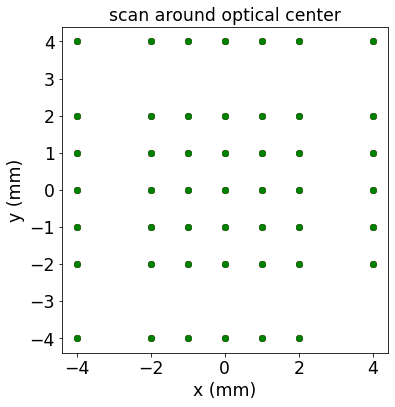

In [58]:
plt.scatter(X0,Y0,facecolor="b")
plt.scatter(X1,Y1,facecolor="r")
plt.scatter(X2,Y2,facecolor="g")
plt.axes().set_aspect('equal')
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.title("scan around optical center")

<ipython-input-48-96db0799bba4>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


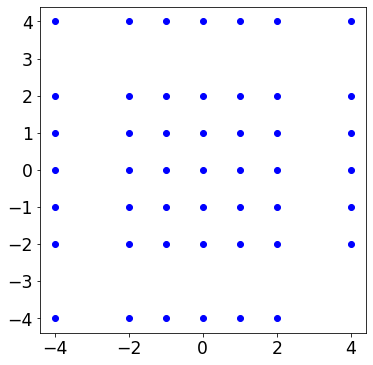

In [48]:
X1,Y1 = list(zip(*list_of_position_1))

plt.scatter(X1,Y1,facecolor="b")
plt.axes().set_aspect('equal')